## Classification of Fire Types in India Using MODIS Satellite Data (2021–2023)

India witnesses various types of fire incidents annually, including forest fires, agricultural burning, volcanic activity, and other thermal anomalies. Accurate identification of fire sources is crucial for timely disaster response, environmental monitoring, and resource management. The MODIS sensors aboard NASA’s Terra and Aqua satellites provide reliable, near real-time thermal anomaly data globally, including for India.

While the MODIS dataset includes rich geospatial and thermal parameters, the challenge lies in correctly classifying the type of fire event — whether it stems from vegetation, volcanoes, static land sources, or offshore sources — using satellite-captured features.

### Objective:
To develop a machine learning classification model that can accurately predict the type of fire using MODIS fire detection data for India from 2021 to 2023

### 🔥 MODIS Dataset Summary (India: 2021–2023)
#### 📌 About MODIS:
The Moderate Resolution Imaging Spectroradiometer (MODIS) is a key NASA sensor aboard the Terra (launched 1999) and Aqua (launched 2002) satellites. It captures Earth observation data at a spatial resolution of 1 km, suitable for global fire monitoring and environmental studies.

MODIS data used in this project is sourced from NASA’s FIRMS (Fire Information for Resource Management System) and focuses on thermal anomalies and active fire detection.

## 🛰️ Satellite Characteristics:
Terra satellite (EOS AM) captures morning overpasses.

Aqua satellite (EOS PM) captures afternoon overpasses.

MODIS provides 2–4 observations per day, especially in mid-latitudes like India.

## 🔍 Fire Detection Mechanism:
*MODIS uses contextual algorithms to detect thermal anomalies.*

*It evaluates each pixel using mid-infrared channels (Bands 21/22 for  fire detection and 31 for surface temperature).*

*The pixel is marked as one of: missing, cloud, water, non-fire, fire, or unknown.*




### ⚠️ Note on Accuracy:
MODIS NRT (Near Real-Time) data may have slightly lower geolocation accuracy, particularly from Aqua satellite due to orbit estimation delays. Errors can occasionally reach several kilometers.



### ✅ Use Cases for MODIS Fire Data:
Real-time wildfire alerts

Agricultural burn detection

Forest fire management

Hotspot pattern analysis in ecological studies



### 📚 Reference Links:
🔗 NASA FIRMS Documentation

🔗 MODIS Active Fire Product Info (LP DAAC)

🔗 Understanding MODIS Fire Algorithm

### 🔬 Important Parameters in MODIS Data:

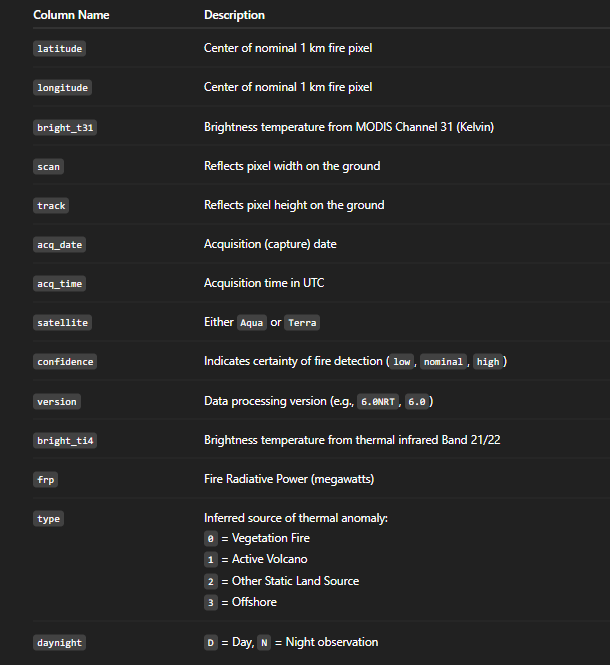




### 📚 Reference Links:

[🔗 NASA FIRMS Documentation](https://www.earthdata.nasa.gov/data/tools/firms)

[🔗 Global Fire Data Access Porta](https://firms.modaps.eosdis.nasa.gov/download/)

### Import Libraries

#### pip install numpy pandas matplotlib seaborn scikit-learn folium

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Load the dataset

In [5]:
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

In [7]:
df1.head() # print first 5 rows - df1.tail()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [9]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [11]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [13]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [15]:
df.shape # rows and cols

(271217, 15)

In [17]:
df.info() # dt, memc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [19]:
# Any missing values?
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [23]:
# List out column names to check
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [25]:
df.describe().T # statistics of dataset - numbers!

,count,mean,std,min,25%,50%,75%,max
latitude,271217.0,23.947505,4.919846,8.1362,20.9655,23.7888,27.7827,34.9734
longitude,271217.0,81.284024,6.559071,68.4526,75.8802,79.3209,84.7559,97.1044
brightness,271217.0,323.719192,14.147221,300.0000,314.5000,322.0000,330.7000,505.7000
scan,271217.0,1.421732,0.630742,1.0000,1.0000,1.2000,1.5000,4.8000
track,271217.0,1.152716,0.201943,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,271217.0,824.623755,353.966965,321.0000,648.0000,756.0000,825.0000,2202.0000
confidence,271217.0,64.065081,18.165329,0.0000,54.0000,66.0000,76.0000,100.0000
version,271217.0,21.933778,24.935515,6.0300,6.0300,6.0300,61.0300,61.0300
bright_t31,271217.0,303.499177,8.282440,267.2000,298.2000,302.5000,309.2000,400.1000
frp,271217.0,27.722058,81.017471,0.0000,8.7000,13.5000,24.5000,6961.8000


In [27]:
# Check Unique values of target variable
df.type.value_counts()

type
0    257625
2     13550
3        42
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

In [29]:
# Check unique and n unique for all categorical features
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']
Number of unique values: 1088
--------------------------------------------------
Column: satellite
Unique values: ['Terra' 'Aqua']
Number of unique values: 2
--------------------------------------------------
Column: instrument
Unique values: ['MODIS']
Number of unique values: 1
--------------------------------------------------
Column: daynight
Unique values: ['D' 'N']
Number of unique values: 2
--------------------------------------------------


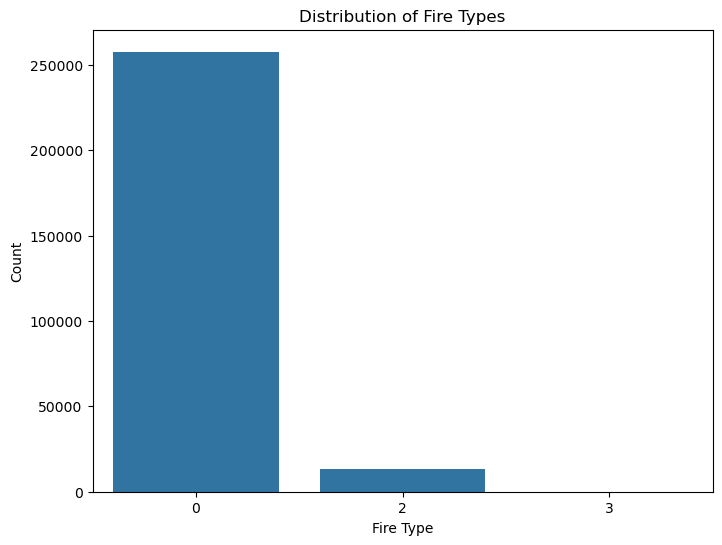

In [53]:
# Count plot for 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()


- The count plot shows the distribution of different fire types in the dataset.
- It is evident that 'MODIS' is the most frequent fire type, followed by 'VIIRS'.
- The 'type' variable appears to be unbalanced, with 'MODIS' having significantly more observations than 'VIIRS'. This imbalance might need to be considered during model training.

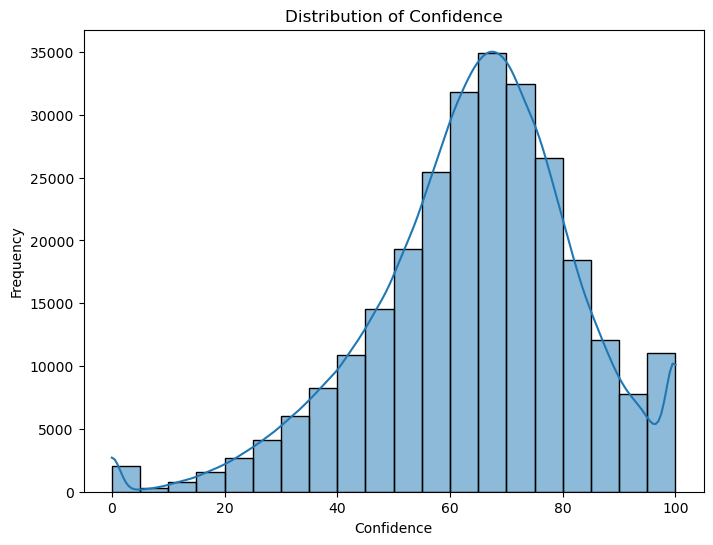

In [31]:
# Histogram of 'confidence'
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

- The histogram illustrates the distribution of the 'confidence' feature.
- The distribution appears to be bimodal, with peaks around low confidence values and high confidence values.
- There are fewer observations in the middle range of confidence.
- This suggests that observations are often recorded with either low confidence or high confidence.

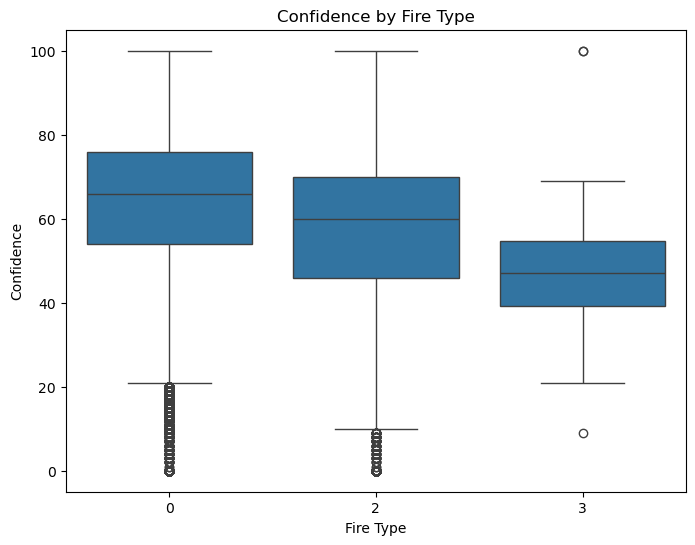

In [33]:
# Box plot for 'confidence' by 'type'
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='confidence', data=df)
plt.title('Confidence by Fire Type')
plt.xlabel('Fire Type')
plt.ylabel('Confidence')
plt.show()

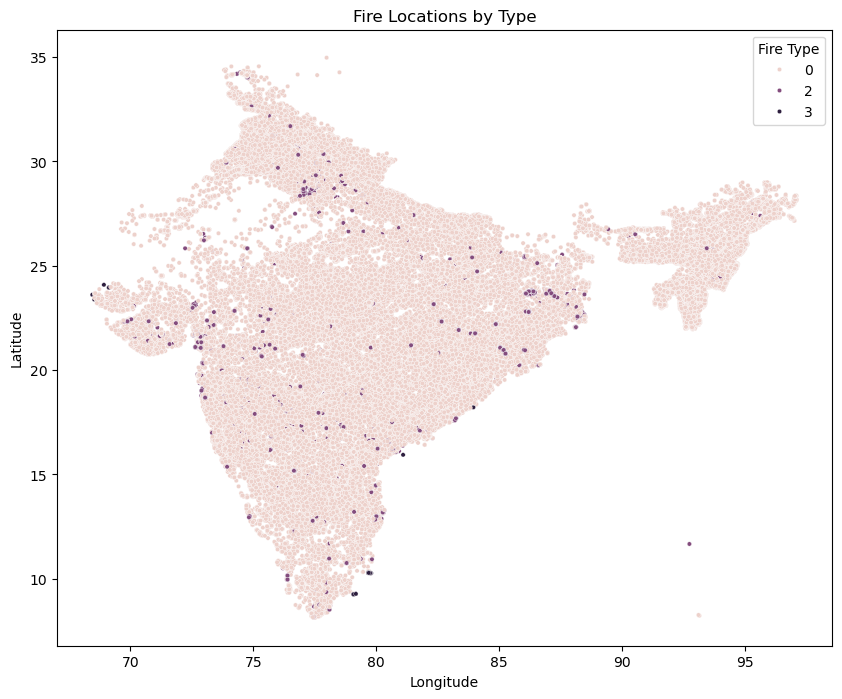

In [35]:
# Scatter plot of 'latitude' vs 'longitude'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='type', s=10)
plt.title('Fire Locations by Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fire Type')
plt.show()

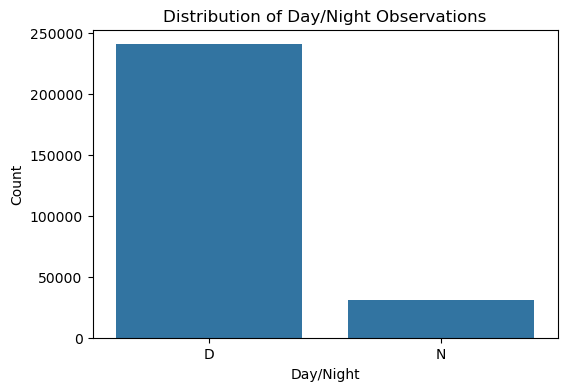

In [37]:
# Count plot for 'daynight'
plt.figure(figsize=(6, 4))
sns.countplot(x='daynight', data=df)
plt.title('Distribution of Day/Night Observations')
plt.xlabel('Day/Night')
plt.ylabel('Count')
plt.show()

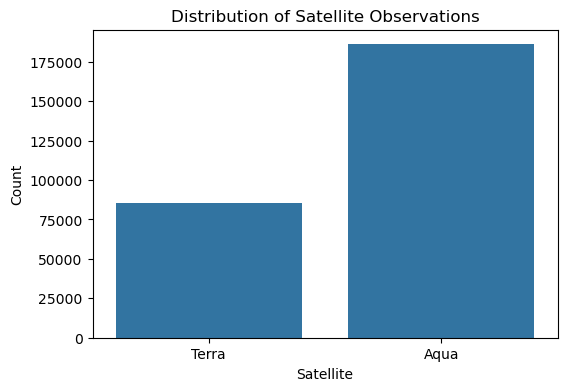

In [39]:
# Count plot for 'Satellite'
plt.figure(figsize=(6, 4))
sns.countplot(x='satellite', data=df)
plt.title('Distribution of Satellite Observations')
plt.xlabel('Satellite')
plt.ylabel('Count')
plt.show()

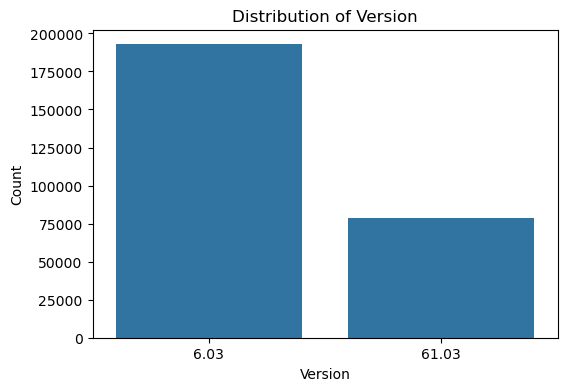

In [41]:
# Count plot for 'version'
plt.figure(figsize=(6, 4))
sns.countplot(x='version', data=df)
plt.title('Distribution of Version')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()

In [43]:
#this code take more time
#Pairplot for numerical features (subset)
#sns.pairplot(df[['latitude', 'longitude', 'brightness', 'confidence', 'frp', 'type']], hue='type', diag_kind='kde')
#plt.suptitle('Pairplot of Numerical Features')
#plt.show()

The pairplot provides a matrix of scatter plots for all pairs of numerical features and histograms/KDE plots on the diagonal for each feature, separated by the 'type' variable. Here are some insights from the pairplot:

Individual Feature Distributions (Diagonal): The diagonal plots (histograms/KDEs) show the distribution of each numerical feature for each fire type.

latitude and longitude: These show the geographical distribution, reinforcing the scatter plot observation. Different fire types appear to be concentrated in certain geographical areas.
brightness: The distribution of brightness values can be compared between fire types. There might be differences in the typical brightness of fires detected by MODIS versus VIIRS.
confidence: This shows the distribution of confidence for each type, similar to the earlier box plot but as a histogram/KDE. It can highlight differences in the confidence levels associated with each fire type.
frp: The distribution of fire radiative power (FRP) can be compared. This might reveal if one fire type tends to have significantly higher or lower FRP values than the other.
Relationships Between Features (Off-Diagonal Scatter Plots): The off-diagonal scatter plots show the relationship between pairs of numerical features, colored by fire type.

latitude vs. longitude: As seen before, this visualizes the geographical distribution by type.
brightness vs. confidence: This plot shows the relationship between brightness and confidence. Is there a correlation? Does higher brightness tend to correlate with higher confidence? How does this relationship differ between fire types?
brightness vs. frp: This shows the relationship between brightness and fire radiative power. These two features are likely related. The plot can reveal the strength and nature of this relationship and whether it varies by fire type.
confidence vs. frp: This visualizes the relationship between confidence and FRP. Does higher FRP tend to result in higher confidence? How does this relationship differ for different fire types?
Other pairs: Examine the relationships between latitude/longitude and the other numerical features (brightness, confidence, frp). Are there geographical patterns in these features?

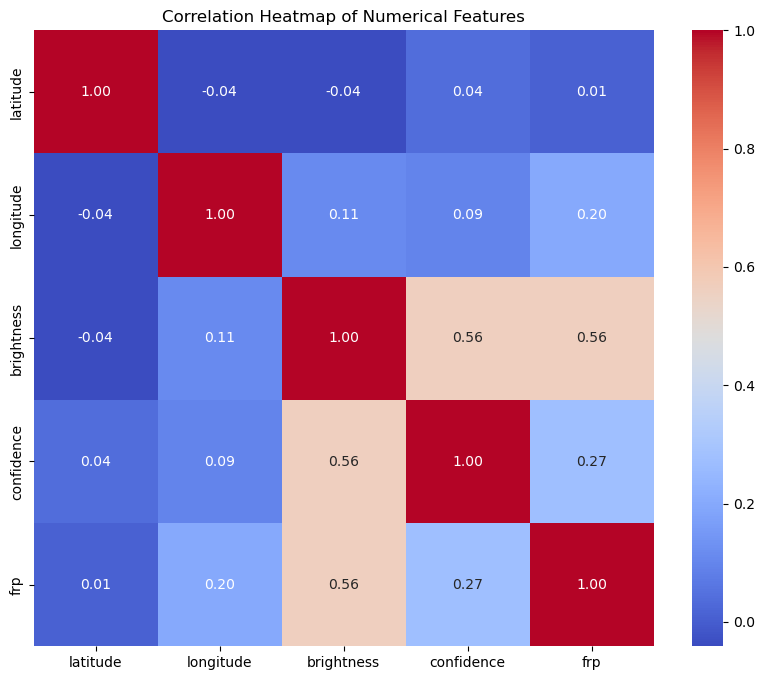

In [45]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['latitude', 'longitude', 'brightness', 'confidence', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [48]:

numerical_cols = df.select_dtypes(include=np.number).columns

In [50]:
numerical_cols

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_time',
       'confidence', 'version', 'bright_t31', 'frp', 'type'],
      dtype='object')

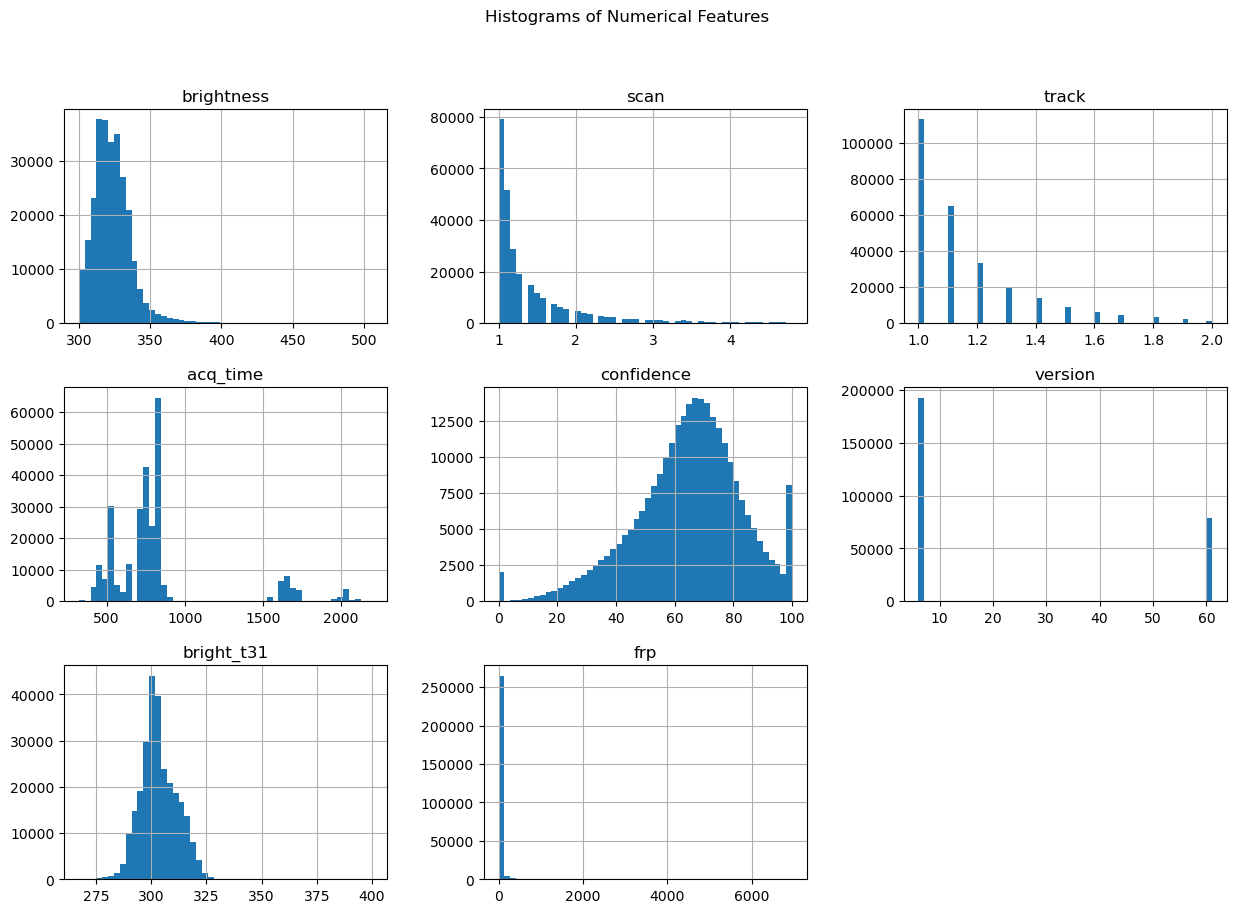

In [52]:
numerical_cols = ['brightness', 'scan', 'track', 'acq_time','confidence', 'version', 'bright_t31', 'frp']
df[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Analyzing distribution for: brightness


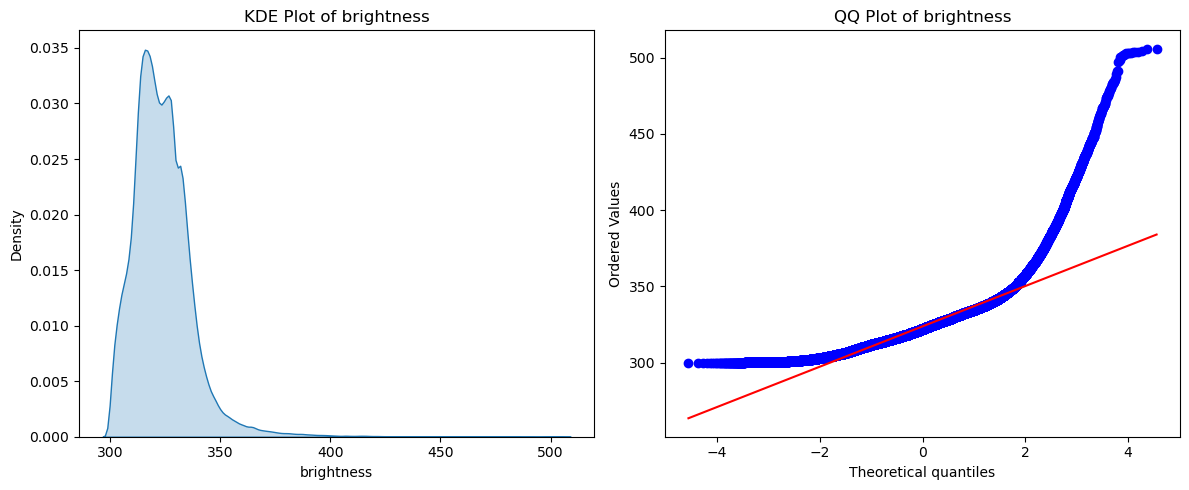

--------------------------------------------------
Analyzing distribution for: confidence


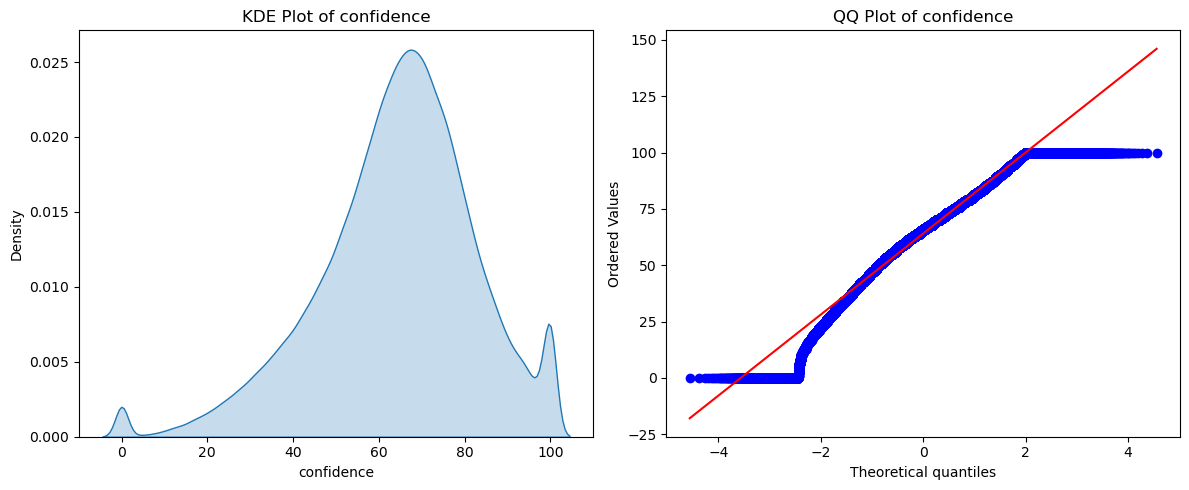

--------------------------------------------------
Analyzing distribution for: frp


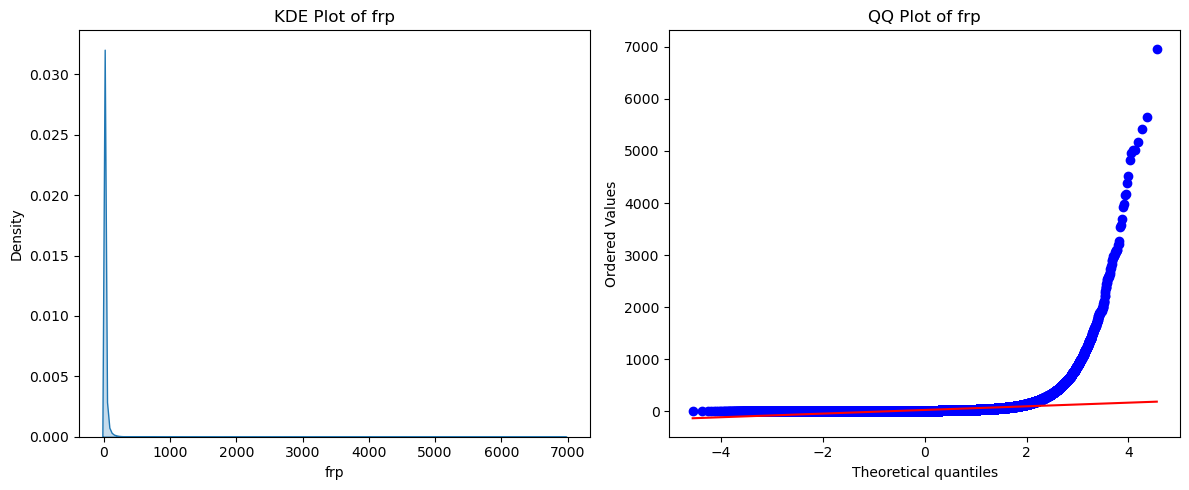

--------------------------------------------------
Analyzing distribution for: bright_t31


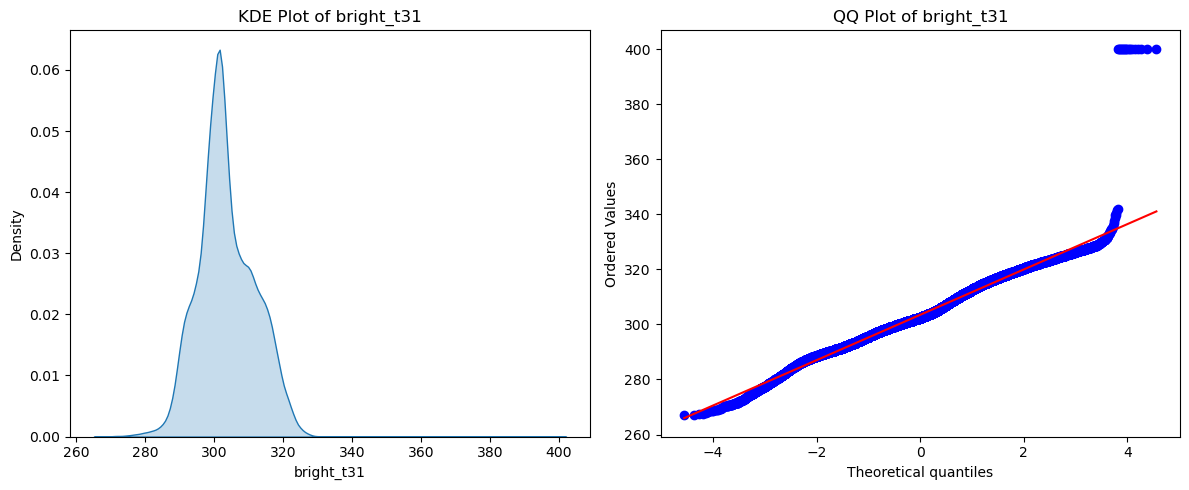

--------------------------------------------------
Analyzing distribution for: scan


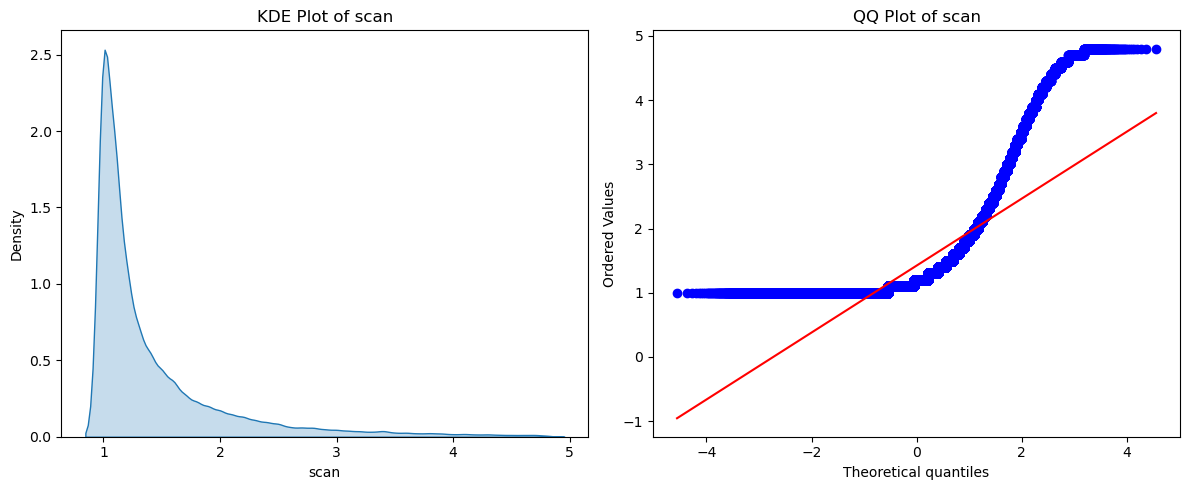

--------------------------------------------------
Analyzing distribution for: track


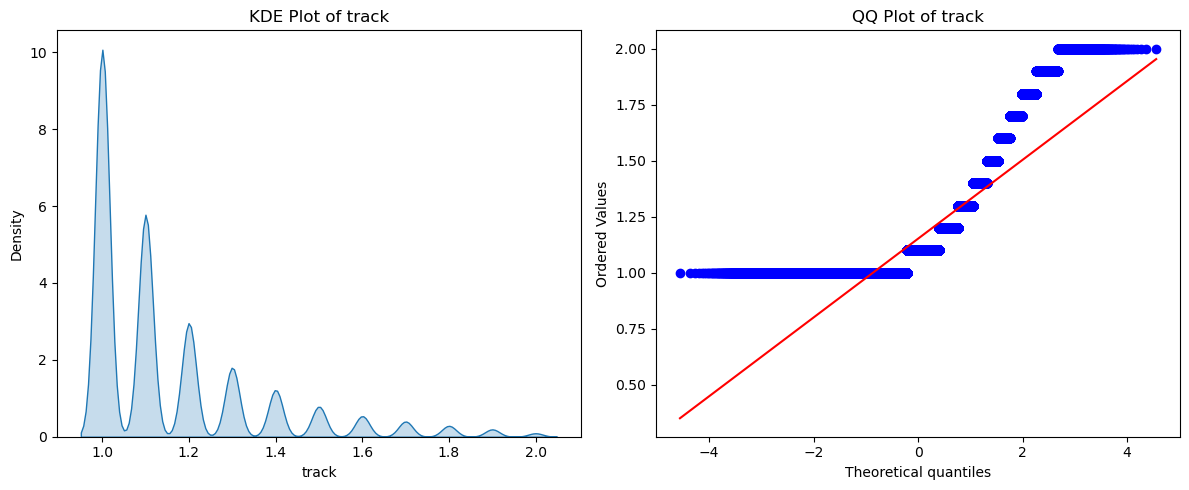

--------------------------------------------------


In [54]:
import statsmodels.api as sm
import scipy.stats as stats

# List of numerical features to check for distribution
numerical_features = ['brightness', 'confidence', 'frp', 'bright_t31', 'scan', 'track']

for feature in numerical_features:
    print(f"Analyzing distribution for: {feature}")

    # KDE Plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.kdeplot(df[feature], fill=True)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # QQ Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature}')

    plt.tight_layout()
    plt.show()
    print("-" * 50)

In [56]:
# --- Temporal Analysis ---
# Convert 'acq_date' to datetime objects
df['acq_date'] = pd.to_datetime(df['acq_date'])
# Extract temporal features
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day_of_week'] = df['acq_date'].dt.dayofweek # Monday=0, Sunday=6
df['day_of_year'] = df['acq_date'].dt.dayofyear
df['hour'] = df['acq_time'].astype(str).str[:2].astype(int) # Assuming acq_time is HHMM

C:\Users\tejas\AppData\Local\Temp\ipykernel_9800\3766763484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='viridis')


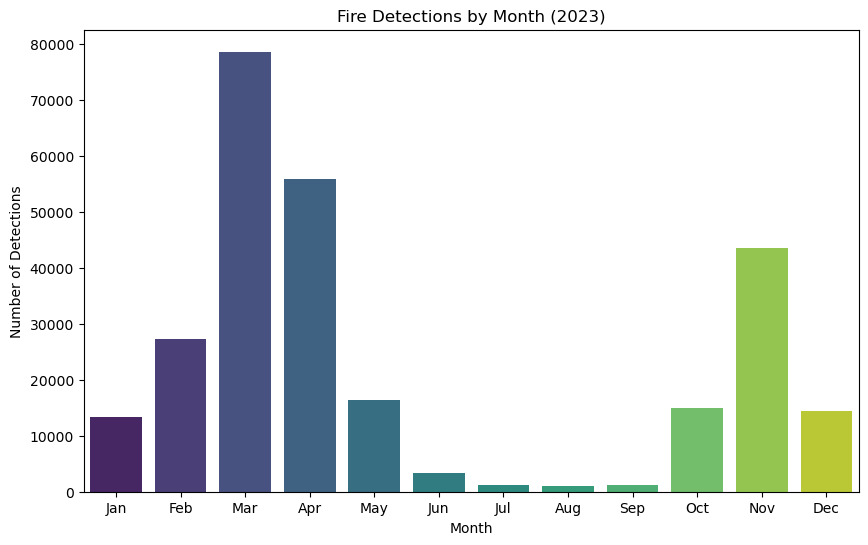

In [58]:
# Visualize fire detections over months
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', palette='viridis')
plt.title('Fire Detections by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_9800\1273489546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', palette='viridis')


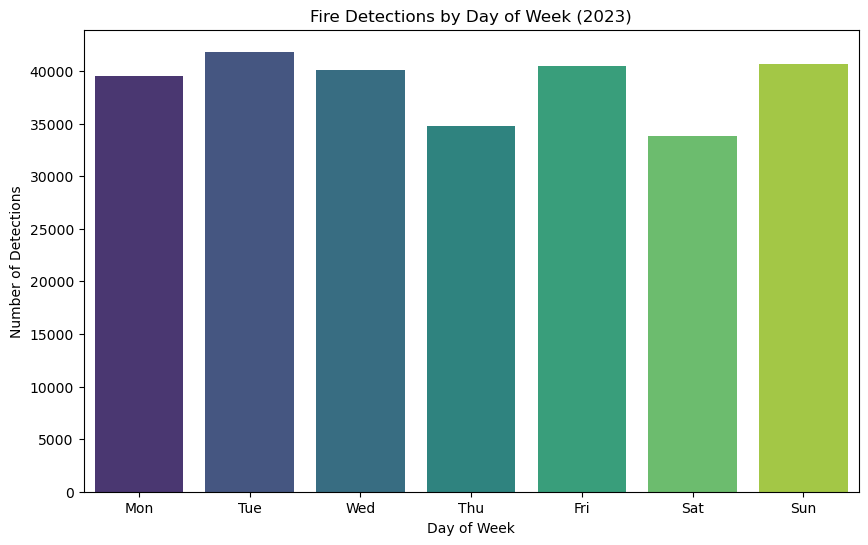

In [60]:

# Visualize fire detections by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', palette='viridis')
plt.title('Fire Detections by Day of Week (2023)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Detections')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

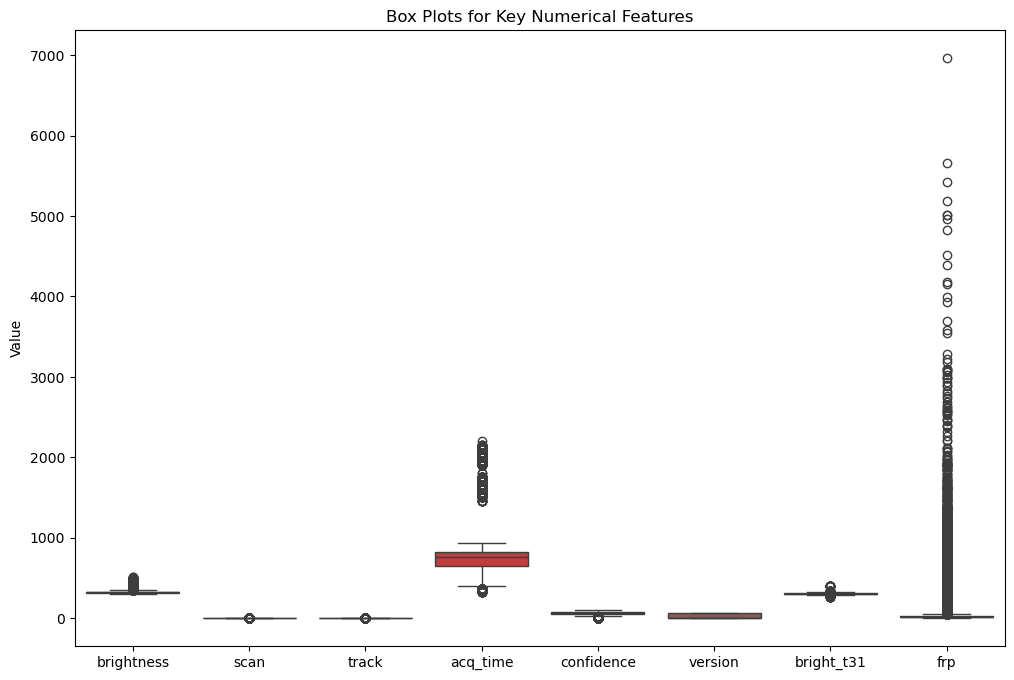

In [62]:
# Visualize outliers using box plots for key numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Key Numerical Features')
plt.ylabel('Value')
plt.show()

In [64]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_cleaned

# Apply outlier removal to numerical columns
for col in numerical_cols:
  df = remove_outliers_iqr(df, col)

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (189370, 20)


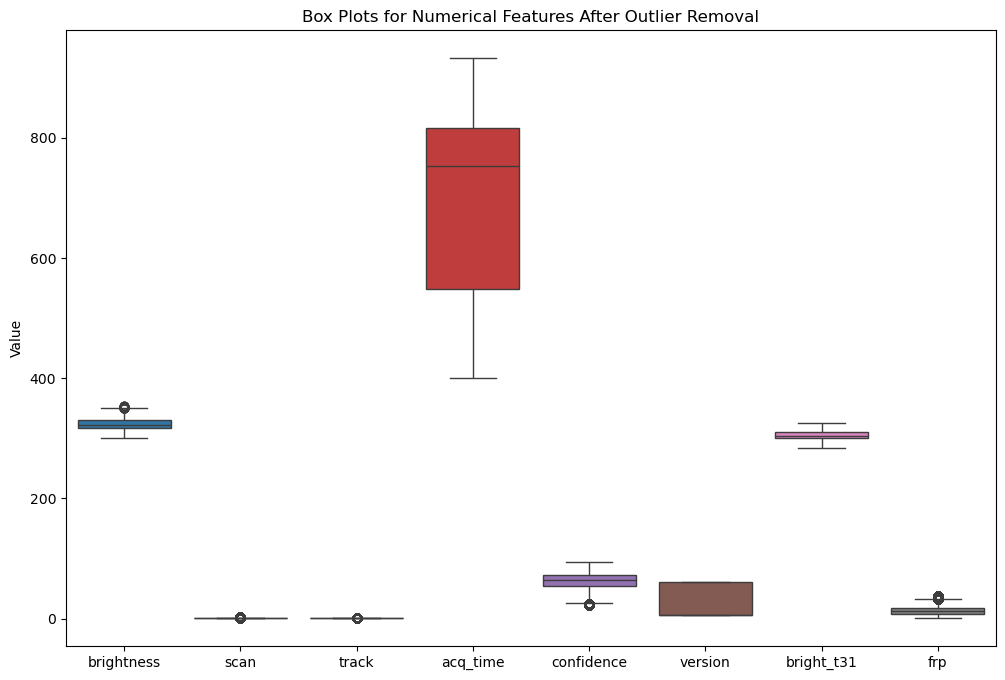

In [66]:
# Visualize box plots after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Numerical Features After Outlier Removal')
plt.ylabel('Value')
plt.show()

In [68]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year,month,day_of_week,day_of_year,hour
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0,2021,1,4,1,40
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0,2021,1,4,1,54
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0,2021,1,4,1,54
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0,2021,1,4,1,54
6,31.4366,76.8988,300.5,1.0,1.0,2021-01-01,547,Terra,MODIS,36,6.03,287.2,5.3,D,0,2021,1,4,1,54


In [70]:
df.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64

In [72]:
categorical_cols = df.select_dtypes(include='object').columns

In [74]:
categorical_cols

Index(['satellite', 'instrument', 'daynight'], dtype='object')

In [76]:
# Select categorical columns for encoding
categorical_cols_to_encode = ['daynight', 'satellite', 'instrument']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

In [78]:
df_encoded.head(100)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,frp,type,year,month,day_of_week,day_of_year,hour,satellite_Terra
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,44,6.03,292.6,8.6,0,2021,1,4,1,40,True
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,37,6.03,287.4,9.0,0,2021,1,4,1,54,True
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,46,6.03,287.7,10.7,0,2021,1,4,1,54,True
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,43,6.03,287.6,9.0,0,2021,1,4,1,54,True
6,31.4366,76.8988,300.5,1.0,1.0,2021-01-01,547,36,6.03,287.2,5.3,0,2021,1,4,1,54,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,23.7766,86.3997,313.8,1.0,1.0,2021-01-02,454,51,6.03,300.9,6.8,2,2021,1,5,2,45,True
117,23.6829,86.0831,310.4,1.1,1.0,2021-01-02,454,61,6.03,297.3,6.2,2,2021,1,5,2,45,True
118,23.6661,86.9215,308.2,1.0,1.0,2021-01-02,454,50,6.03,297.4,4.8,2,2021,1,5,2,45,True
119,23.8059,86.3222,313.5,1.0,1.0,2021-01-02,454,66,6.03,300.9,8.1,0,2021,1,5,2,45,True


In [80]:
df_encoded.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64